In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # decision tree model 
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/Decision_tree.csv")  
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x_column = data.columns[:-1]
print(x_column)
y_column = data.columns[-1]
print(y_column)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Outcome


In [ ]:
# View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# define x and y
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [ ]:
# Split data into separate training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 55688)
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [ ]:
# Create decision tree model
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
dt_entropy.fit(x_train, y_train)

# use trained model to predict x_test
y_pred_entropy = dt_entropy.predict(x_test)


In [ ]:
print('Training score: {:.4f}'.format(dt_entropy.score(x_train, y_train)))
print('Testing score: {:.4f}'.format(dt_entropy.score(x_test, y_test)))

Training score: 0.7850
Testing score: 0.7208


[Text(0.5, 0.875, 'X[1] <= 127.5\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.25, 0.625, 'X[5] <= 26.4\nentropy = 0.674\nsamples = 389\nvalue = [320, 69]'),
 Text(0.125, 0.375, 'X[5] <= 9.1\nentropy = 0.177\nsamples = 113\nvalue = [110, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.078\nsamples = 105\nvalue = [104, 1]'),
 Text(0.375, 0.375, 'X[7] <= 30.5\nentropy = 0.794\nsamples = 276\nvalue = [210, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.571\nsamples = 163\nvalue = [141, 22]'),
 Text(0.4375, 0.125, 'entropy = 0.964\nsamples = 113\nvalue = [69, 44]'),
 Text(0.75, 0.625, 'X[5] <= 29.95\nentropy = 0.939\nsamples = 225\nvalue = [80, 145]'),
 Text(0.625, 0.375, 'X[7] <= 22.5\nentropy = 0.939\nsamples = 59\nvalue = [38, 21]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.985\nsamples = 49\nvalue = [28, 21]'),
 Text(0.875, 0.375, 'X[1] <= 157.5\nentro

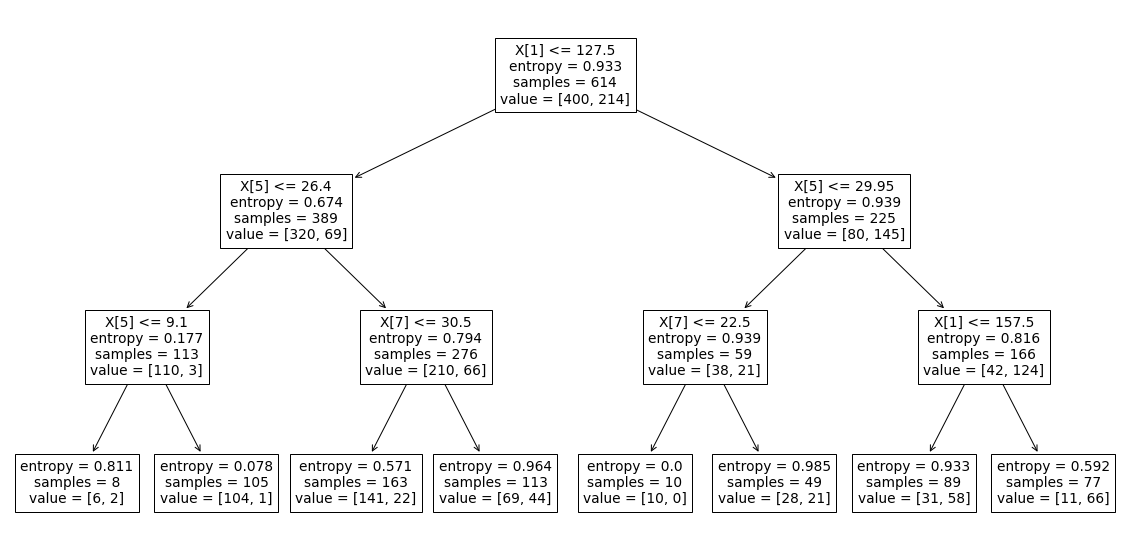

In [ ]:
# Visualize decision-tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_entropy.fit(x_train, y_train)) 

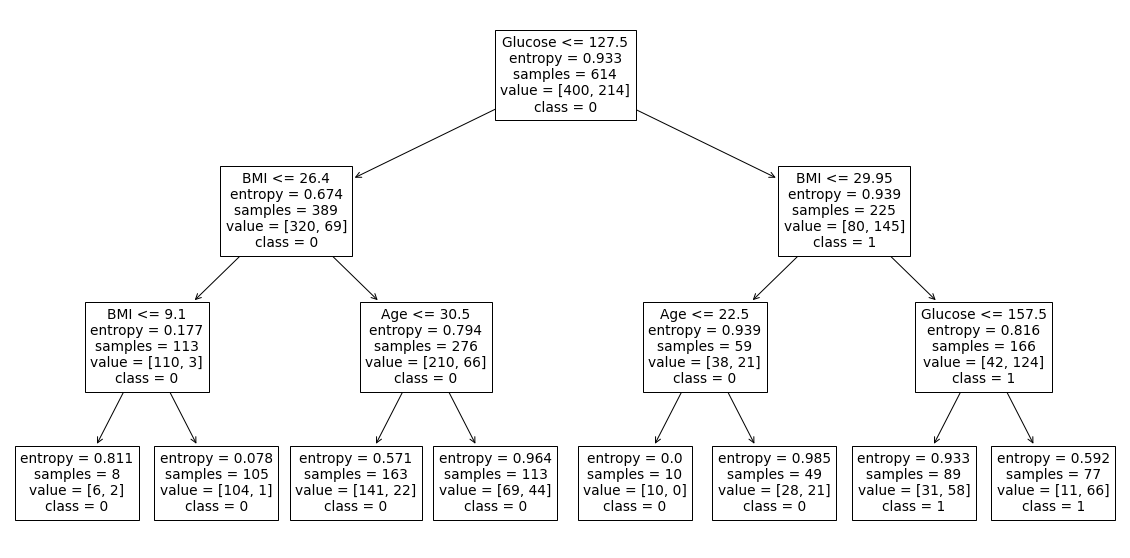

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_entropy, feature_names = x_column, class_names=['0','1']);